In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

<h3>Settings</h3>

In [2]:
result_dir = ""

compiler_type_vms = ["asmble", "wasmer", "wavm"]

interpreter_type_vms = ["life", "wasmi"] # TODO: add wagon after result has been collected

# the list of enabled test names
test_names = ["snappy_compression_5_1000000_1Kb", \
              "snappy_compression_5_10_100Mb", \
              "deflate_compression_5_100000_1Kb", \
              "deflate_compression_5_5_100Mb", \
              "fibonacci_38", \
              "factorization_2147483647", \
              "recursive_hash_10000000_0", \
              "matrix_product_1_10_1000000", \
              "matrix_product_1_500_100", \
              "svd_decomposition_1_10_1000000", \
              "svd_decomposition_1_300_100", \
              "qr_decomposition_1_10_1000000", \
              "qr_decomposition_1_500_100"]

<h3>Import results</h3>

In [3]:
from collections import defaultdict

def read_results(file_name):
    results = defaultdict(list)
    csv_results = pd.read_csv(file_name)
    for test_name, elapsed_time in zip(csv_results["test_name"], csv_results["elapsed_time"]):
        results[test_name].append(elapsed_time)
        
    return results

In [4]:
from os.path import join

vm_results = {}
for compiler_vm in compiler_type_vms:
    vm_results[compiler_vm] = read_results(join(result_dir, compiler_vm + ".csv"))

for interpreter_vm in interpreter_type_vms:
    vm_results[interpreter_vm] = read_results(join(result_dir, interpreter_vm + ".csv"))

<h3>Results preparation</h3>

In [5]:
tests_result = defaultdict(list)
df_results = {}
interpreter_tests_result = {}

for test_name in test_names:
    for vm_name in vm_results:
        tests_result[test_name].append(vm_results[vm_name][test_name])
        
    df_results[test_name] = pd.DataFrame(pd.DataFrame(tests_result[test_name]).T.values, columns=vm_results.keys())

<h2>Box plots</h2>

In [65]:
fontsize=15

def adjust_line2D_linewidth(line2d, box_line_width, whisker_line_width, cap_line_width, median_line_width):
    for box in line2d['boxes']:
        box.set(linewidth=box_line_width)
    
    for whisker in line2d['whiskers']:
        whisker.set(linewidth=whisker_line_width)

    for cap in line2d['caps']:
        cap.set(linewidth=cap_line_width)

    for median in line2d['medians']:
        median.set(linewidth=median_line_width)
        
def draw_plotbox(df, column, figsize, test_name, fontsize):
    lines = df.boxplot(figsize=figsize, column=column, return_type='dict', widths=0.5, fontsize=fontsize, showmeans=True)
    adjust_line2D_linewidth(lines, 2, 1, 1, 1)
    plt.title(test_name, fontsize=fontsize)
    plt.ylabel("sec", fontsize=fontsize)
    plt.show()

<h3>snappy_compression_5_1000000_1Kb</h3>

In [74]:
plot_test_name="snappy_compression_5_1000000_1Kb"
figsize=(10,10)

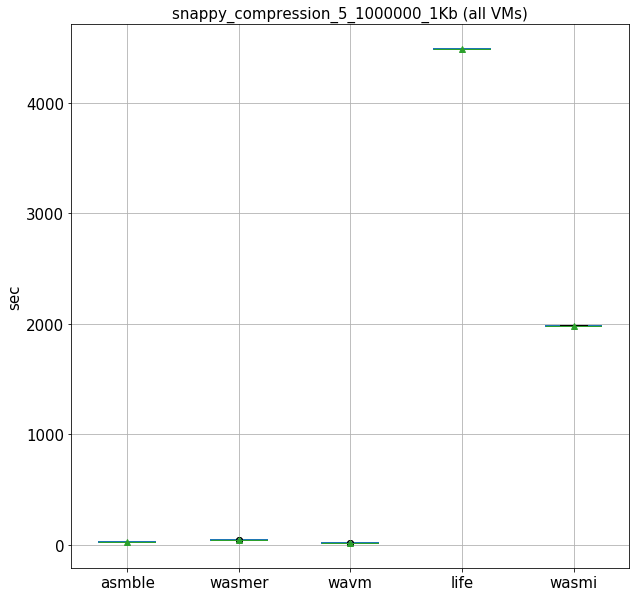

In [75]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms + interpreter_type_vms, figsize, plot_test_name + " (all VMs)", fontsize)

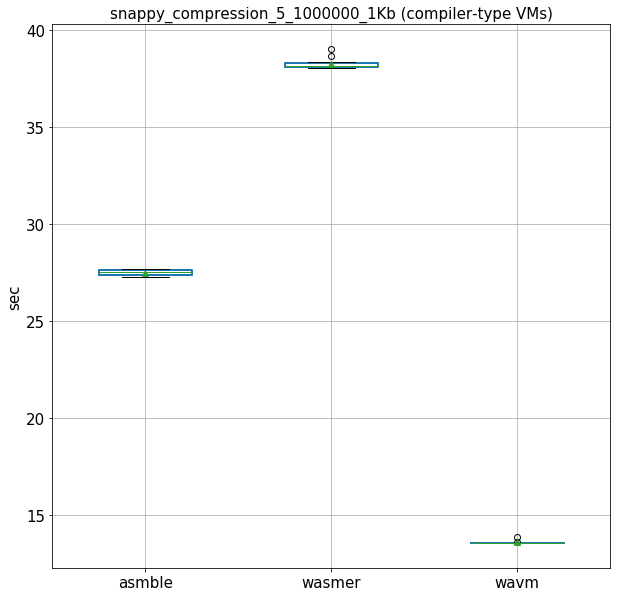

In [76]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms, figsize, plot_test_name + " (compiler-type VMs)", fontsize)

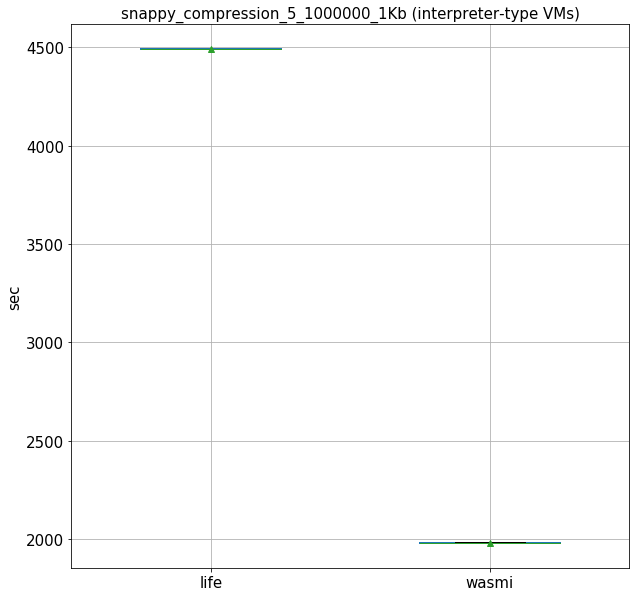

In [77]:
draw_plotbox(df_results[plot_test_name], interpreter_type_vms, figsize, plot_test_name + " (interpreter-type VMs)", fontsize)

<h3>snappy_compression_5_10_100Mb</h3>

In [11]:
plot_test_name="snappy_compression_5_10_100Mb"
figsize=(10,10)

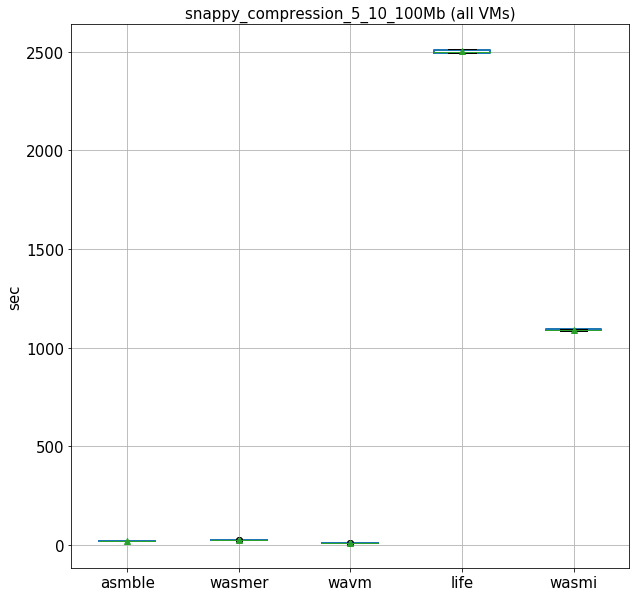

In [12]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms + interpreter_type_vms, figsize, plot_test_name + " (all VMs)", fontsize)

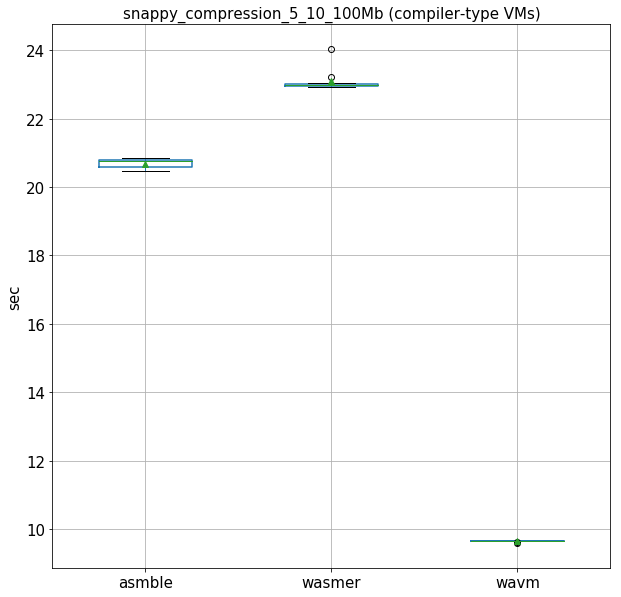

In [13]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms, figsize, plot_test_name + " (compiler-type VMs)", fontsize)

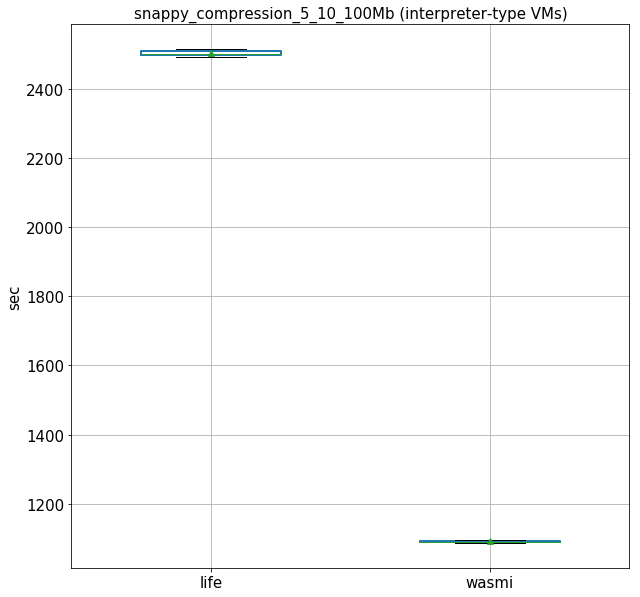

In [14]:
draw_plotbox(df_results[plot_test_name], interpreter_type_vms, figsize, plot_test_name + " (interpreter-type VMs)", fontsize)

<h3>deflate_compression_5_100000_1Kb</h3>

In [15]:
plot_test_name="deflate_compression_5_100000_1Kb"
figsize=(10,10)

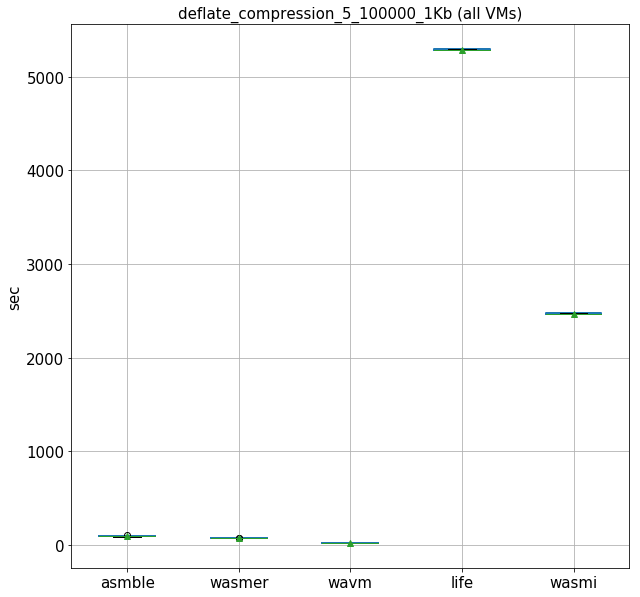

In [16]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms + interpreter_type_vms, figsize, plot_test_name + " (all VMs)", fontsize)

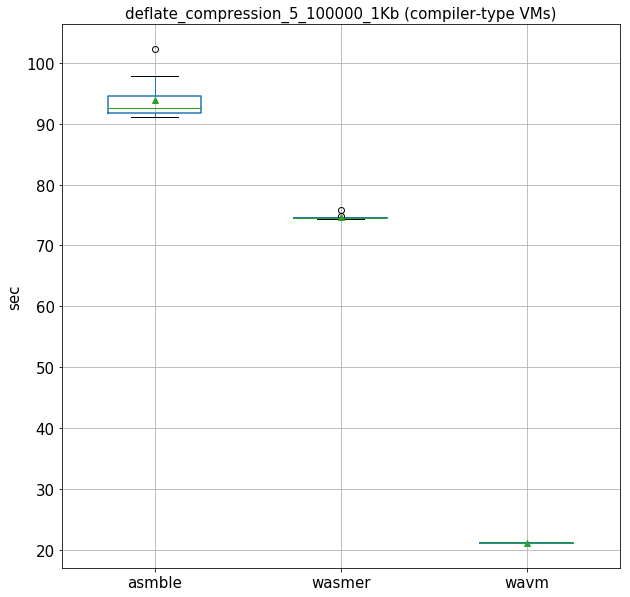

In [17]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms, figsize, plot_test_name + " (compiler-type VMs)", fontsize)

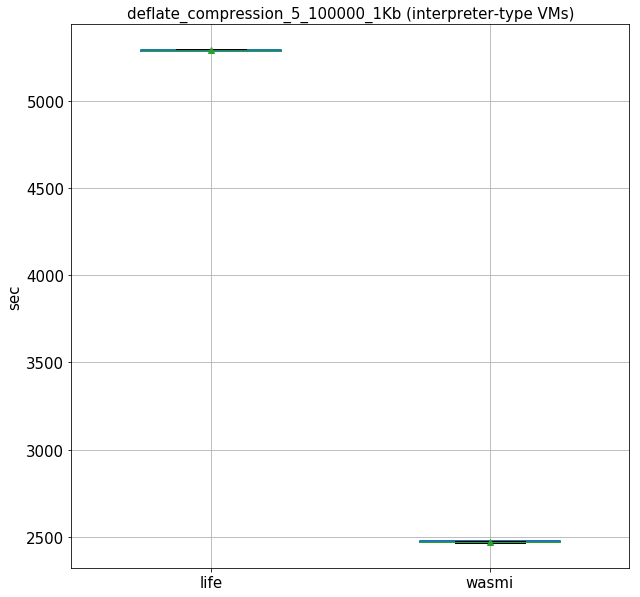

In [18]:
draw_plotbox(df_results[plot_test_name], interpreter_type_vms, figsize, plot_test_name + " (interpreter-type VMs)", fontsize)

<h3>deflate_compression_5_5_100Mb</h3>

In [19]:
plot_test_name="deflate_compression_5_5_100Mb"
figsize=(10,10)

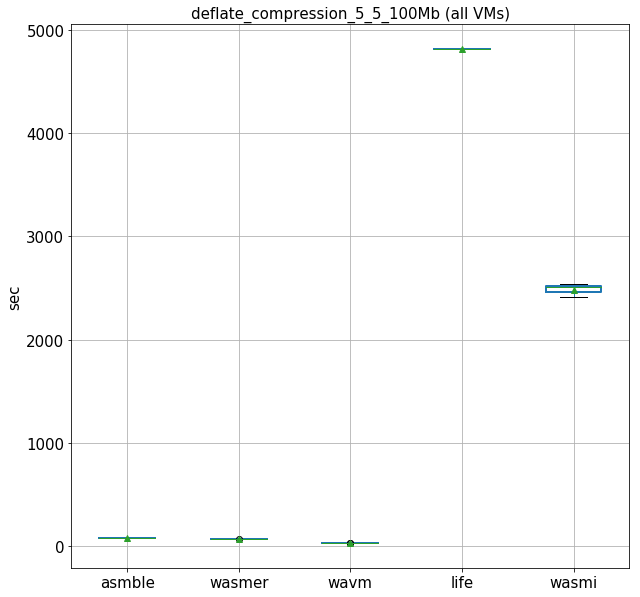

In [20]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms + interpreter_type_vms, figsize, plot_test_name + " (all VMs)", fontsize)

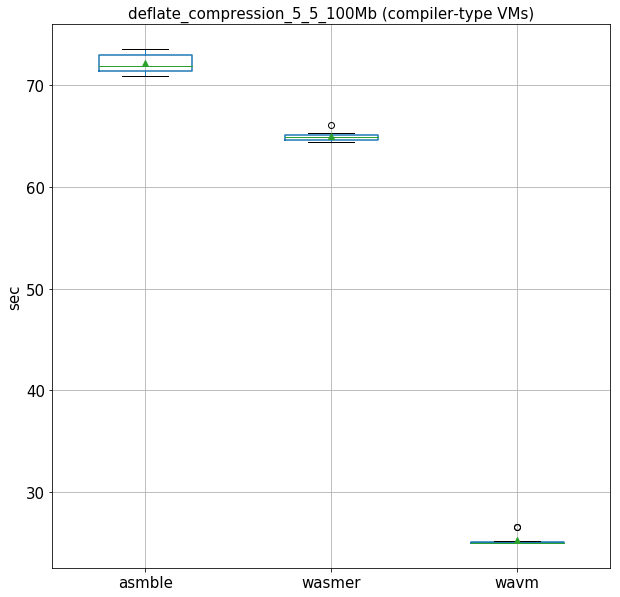

In [21]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms, figsize, plot_test_name + " (compiler-type VMs)", fontsize)

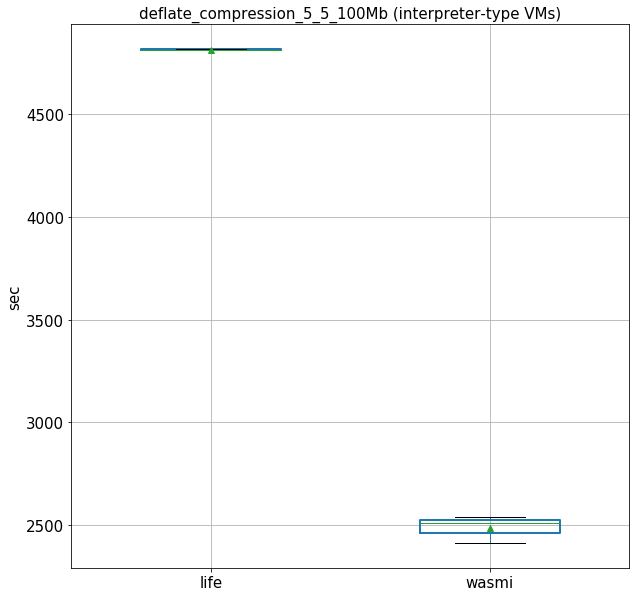

In [22]:
draw_plotbox(df_results[plot_test_name], interpreter_type_vms, figsize, plot_test_name + " (interpreter-type VMs)", fontsize)

<h3>fibonacci_38</h3>

In [23]:
plot_test_name="fibonacci_38"
figsize=(10,10)

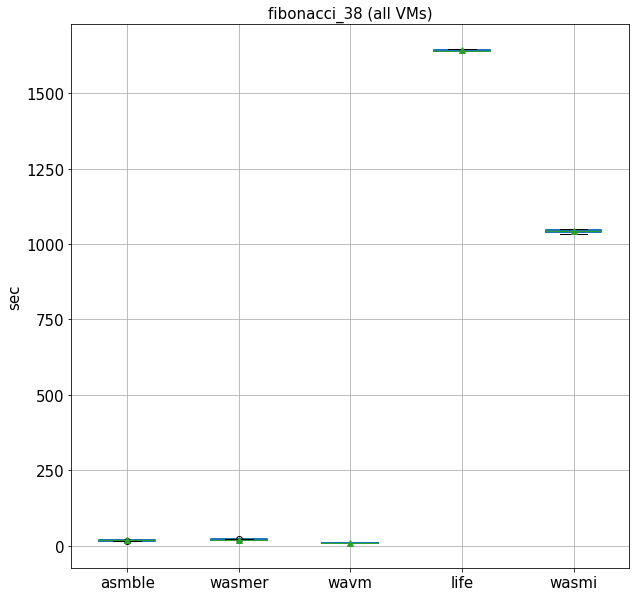

In [24]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms + interpreter_type_vms, figsize, plot_test_name + " (all VMs)", fontsize)

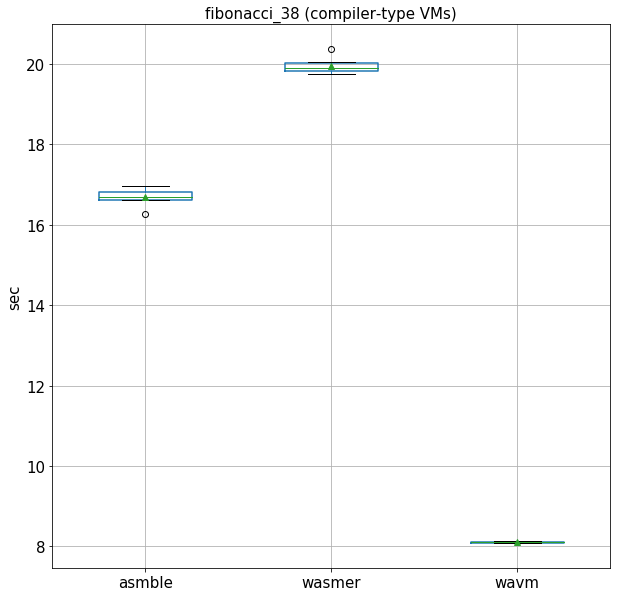

In [25]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms, figsize, plot_test_name + " (compiler-type VMs)", fontsize)

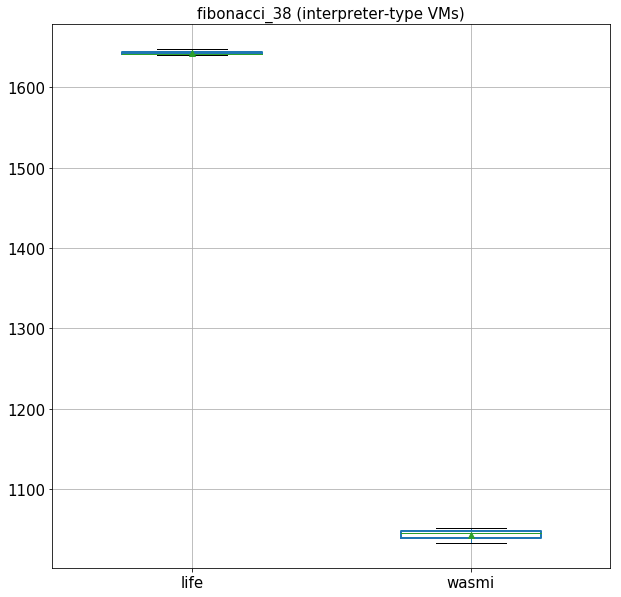

In [26]:
draw_plotbox(df_results[plot_test_name], interpreter_type_vms, figsize, plot_test_name + " (interpreter-type VMs)", fontsize)

<h3>factorization_2147483647</h3>

In [27]:
plot_test_name="factorization_2147483647"
figsize=(10,10)

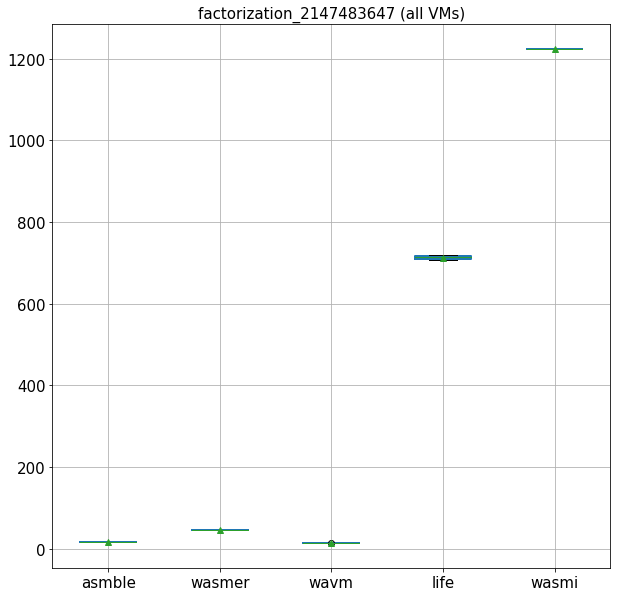

In [28]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms + interpreter_type_vms, figsize, plot_test_name + " (all VMs)", fontsize)

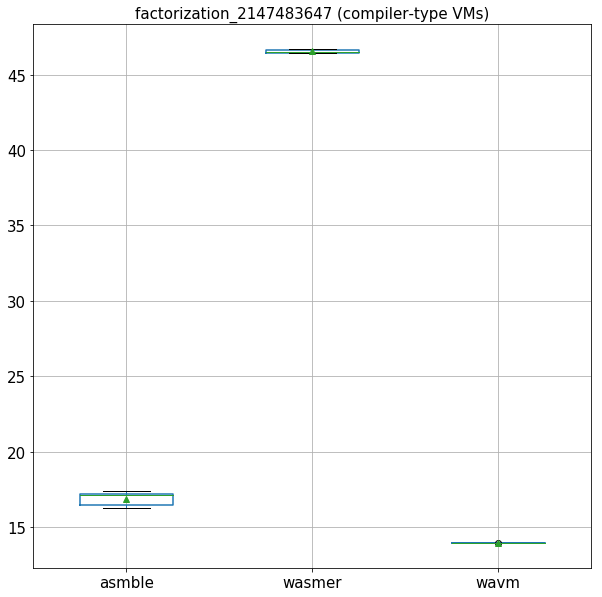

In [29]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms, figsize, plot_test_name + " (compiler-type VMs)", fontsize)

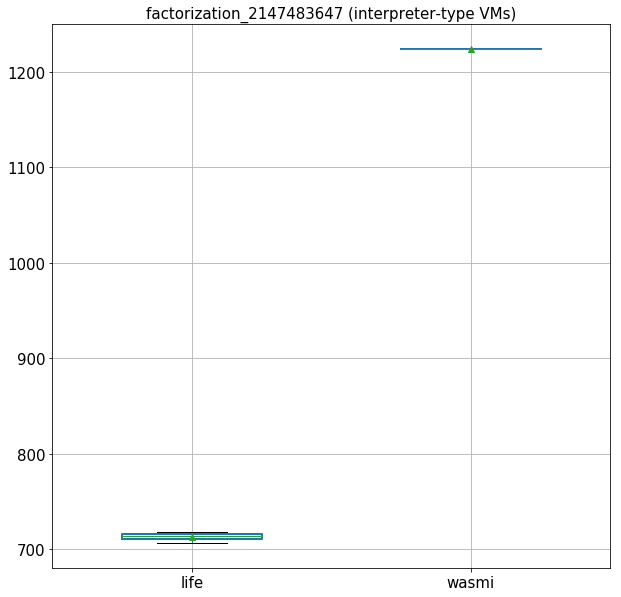

In [30]:
draw_plotbox(df_results[plot_test_name], interpreter_type_vms, figsize, plot_test_name + " (interpreter-type VMs)", fontsize)

<h3>recursive_hash_10000000_0</h3>

In [31]:
plot_test_name="recursive_hash_10000000_0"
figsize=(10,10)

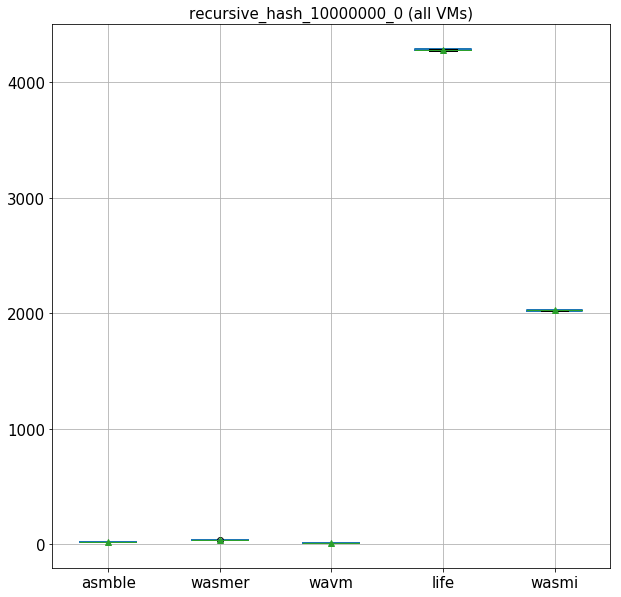

In [32]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms + interpreter_type_vms, figsize, plot_test_name + " (all VMs)", fontsize)

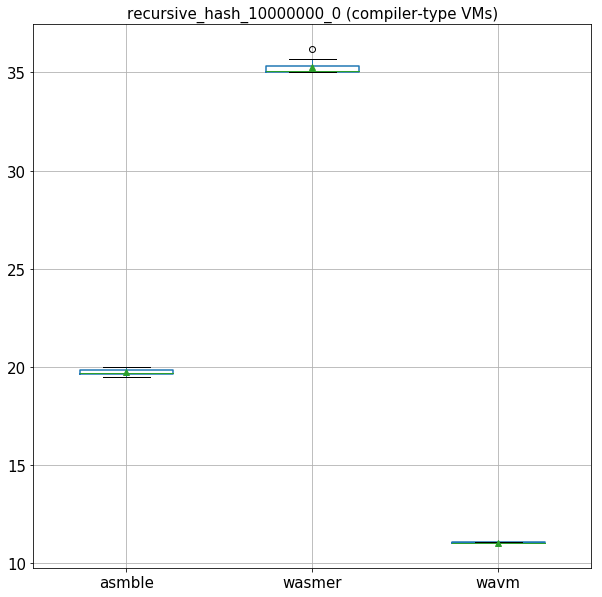

In [33]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms, figsize, plot_test_name + " (compiler-type VMs)", fontsize)

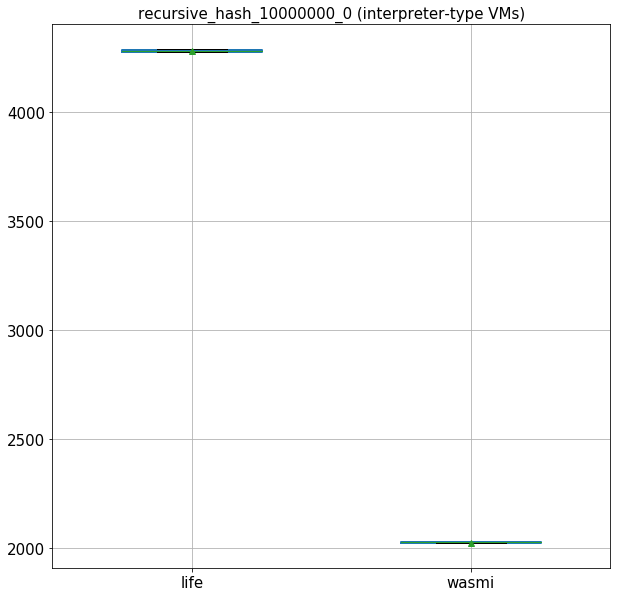

In [34]:
draw_plotbox(df_results[plot_test_name], interpreter_type_vms, figsize, plot_test_name + " (interpreter-type VMs)", fontsize)

<h3>matrix_product_1_10_1000000</h3>

In [35]:
plot_test_name="matrix_product_1_10_1000000"
figsize=(10,10)

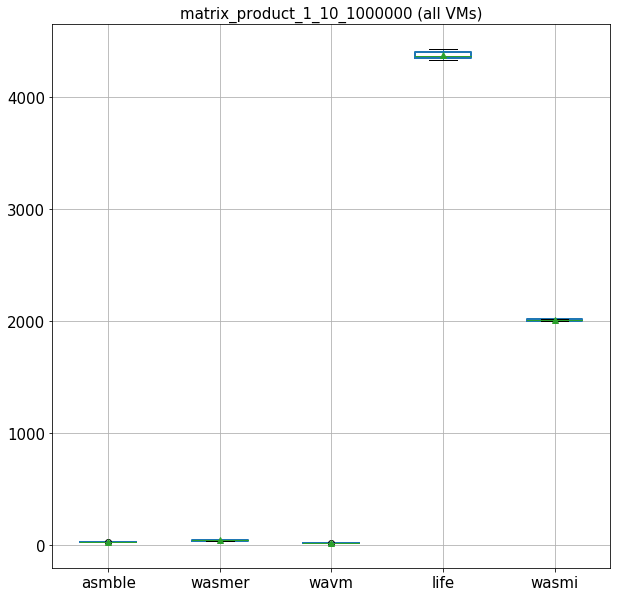

In [36]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms + interpreter_type_vms, figsize, plot_test_name + " (all VMs)", fontsize)

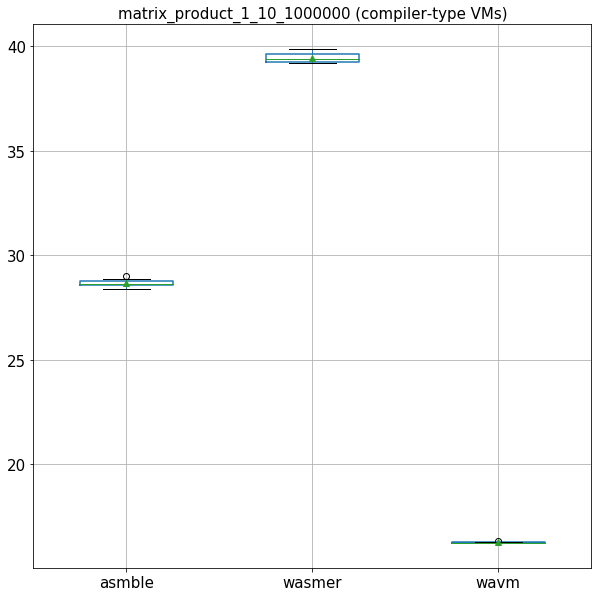

In [37]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms, figsize, plot_test_name + " (compiler-type VMs)", fontsize)

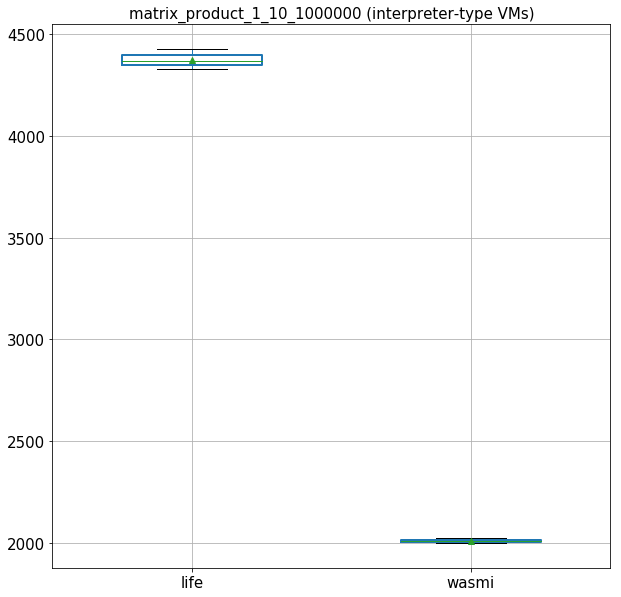

In [38]:
draw_plotbox(df_results[plot_test_name], interpreter_type_vms, figsize, plot_test_name + " (interpreter-type VMs)", fontsize)

<h3>matrix_product_1_500_100</h3>

In [39]:
plot_test_name="matrix_product_1_500_100"
figsize=(10,10)

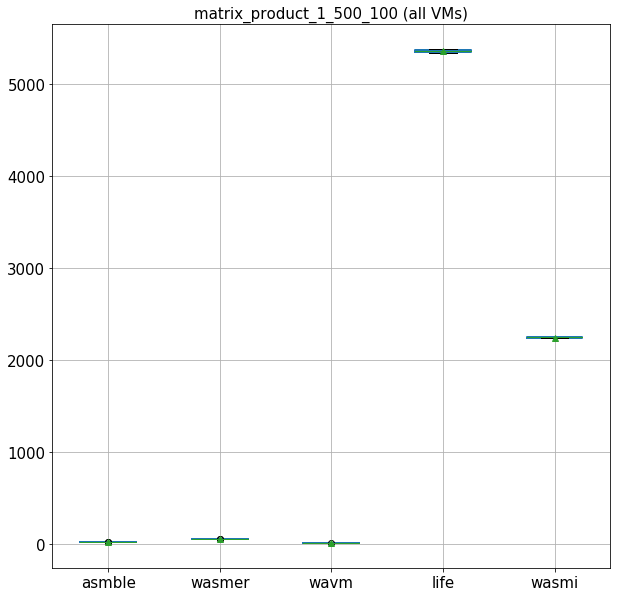

In [40]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms + interpreter_type_vms, figsize, plot_test_name + " (all VMs)", fontsize)

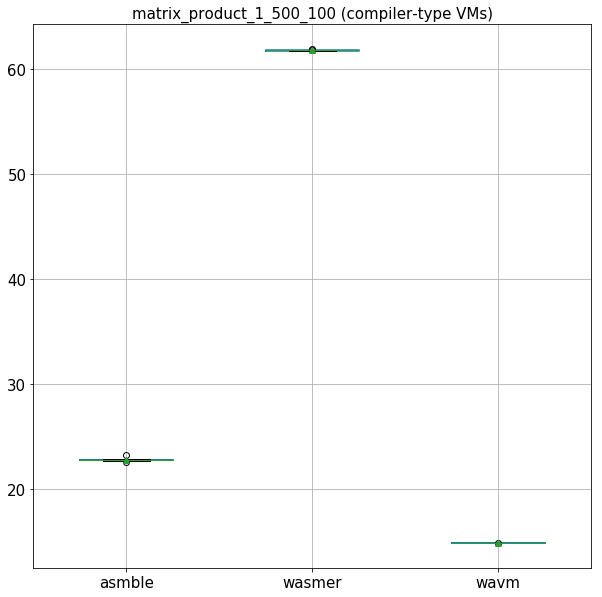

In [41]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms, figsize, plot_test_name + " (compiler-type VMs)", fontsize)

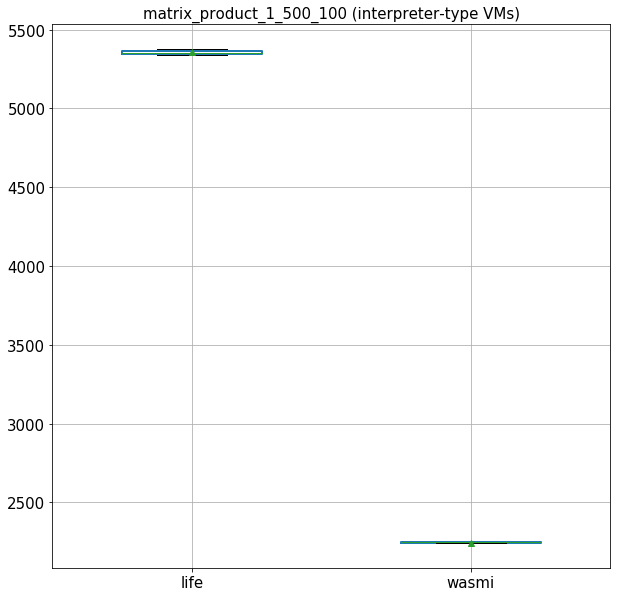

In [42]:
draw_plotbox(df_results[plot_test_name], interpreter_type_vms, figsize, plot_test_name + " (interpreter-type VMs)", fontsize)

<h3>svd_decomposition_1_10_1000000</h3>

In [43]:
plot_test_name="svd_decomposition_1_10_1000000"
figsize=(10,10)

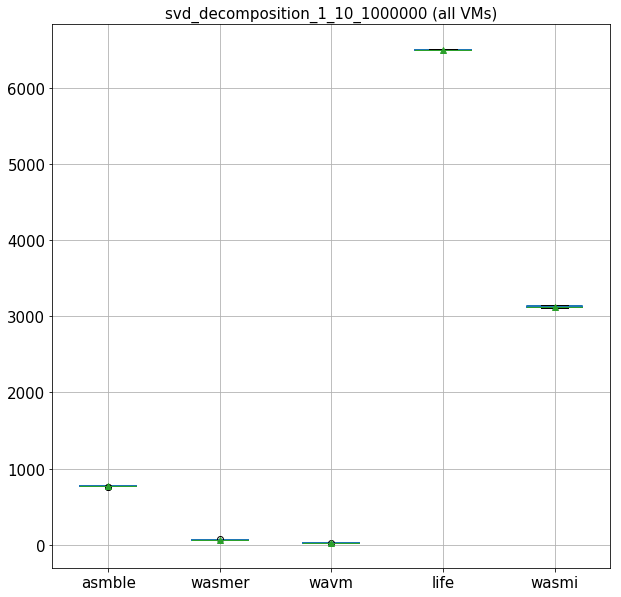

In [44]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms + interpreter_type_vms, figsize, plot_test_name + " (all VMs)", fontsize)

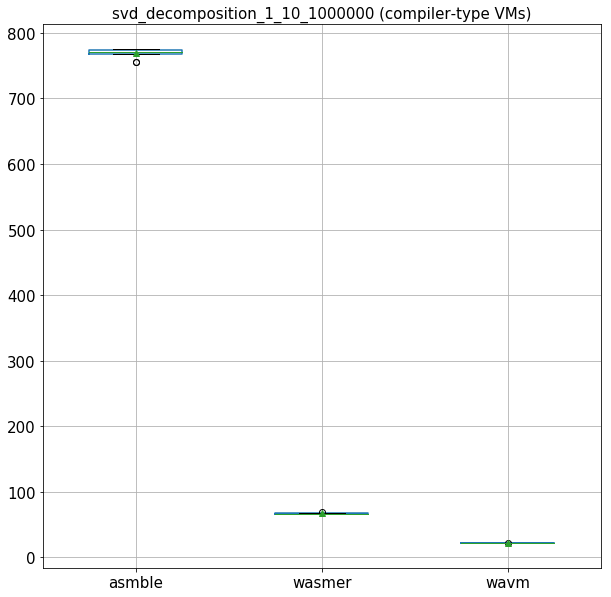

In [45]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms, figsize, plot_test_name + " (compiler-type VMs)", fontsize)

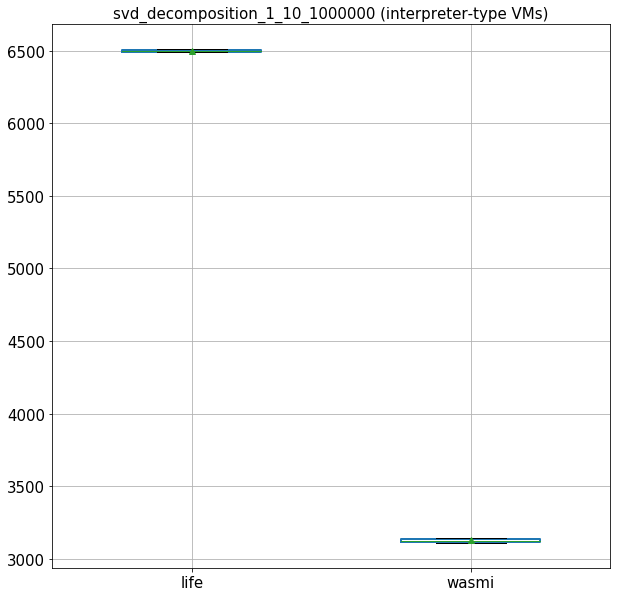

In [46]:
vm = df_results[plot_test_name].boxplot(figsize=figsize, column=interpreter_type_vms, return_type='dict',widths=0.5, fontsize=fontsize, showmeans=True)
adjust_line2D_linewidth(vm, 2, 1, 1, 1)
plt.title(plot_test_name + " (interpreter-type VMs)", fontsize=fontsize)
plt.show()

<h3>svd_decomposition_1_300_100</h3>

In [47]:
plot_test_name="svd_decomposition_1_300_100"
figsize=(10,10)

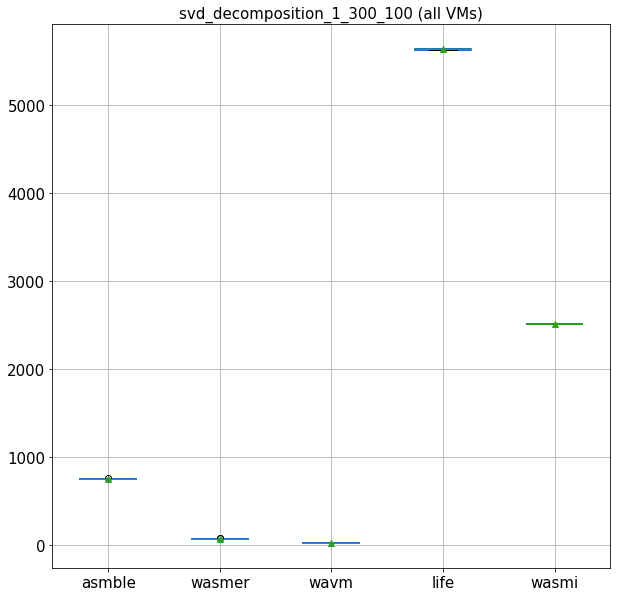

In [48]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms + interpreter_type_vms, figsize, plot_test_name + " (all VMs)", fontsize)

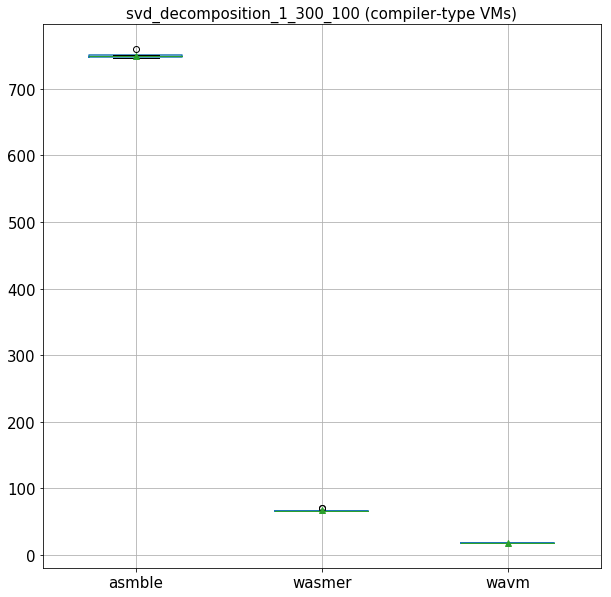

In [49]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms, figsize, plot_test_name + " (compiler-type VMs)", fontsize)

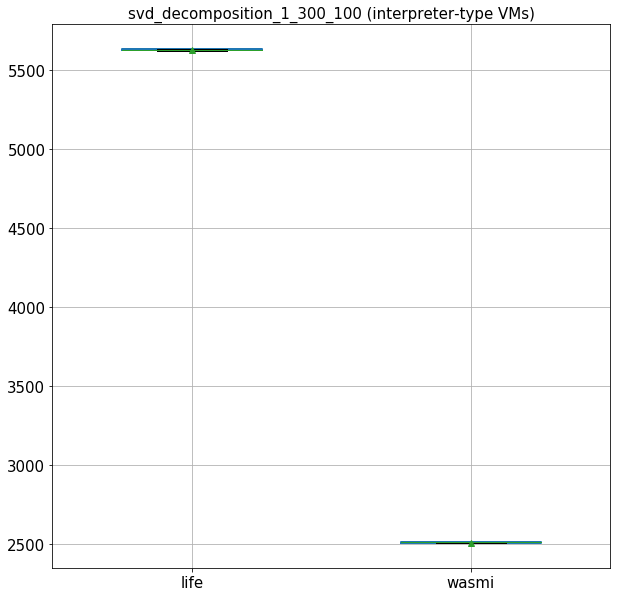

In [50]:
vm = df_results[plot_test_name].boxplot(figsize=figsize, column=interpreter_type_vms, return_type='dict',widths=0.5, fontsize=fontsize, showmeans=True)
adjust_line2D_linewidth(vm, 2, 1, 1, 1)
plt.title(plot_test_name + " (interpreter-type VMs)", fontsize=fontsize)
plt.show()

<h3>qr_decomposition_1_10_1000000</h3>

In [51]:
plot_test_name="qr_decomposition_1_10_1000000"
figsize=(10,10)

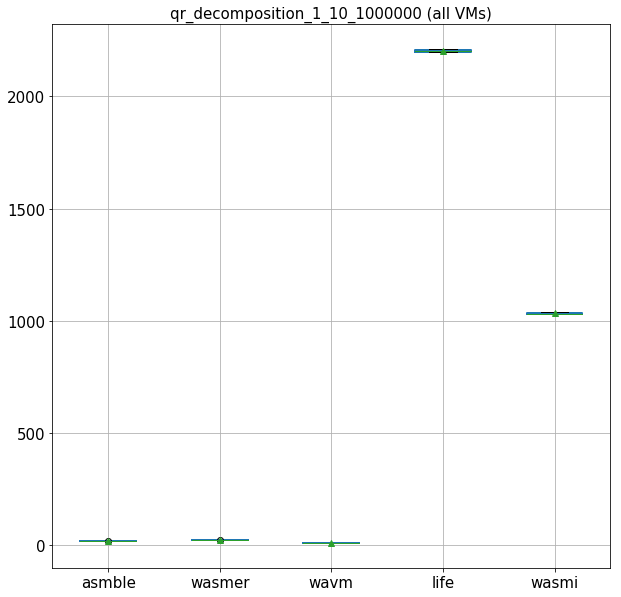

In [52]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms + interpreter_type_vms, figsize, plot_test_name + " (all VMs)", fontsize)

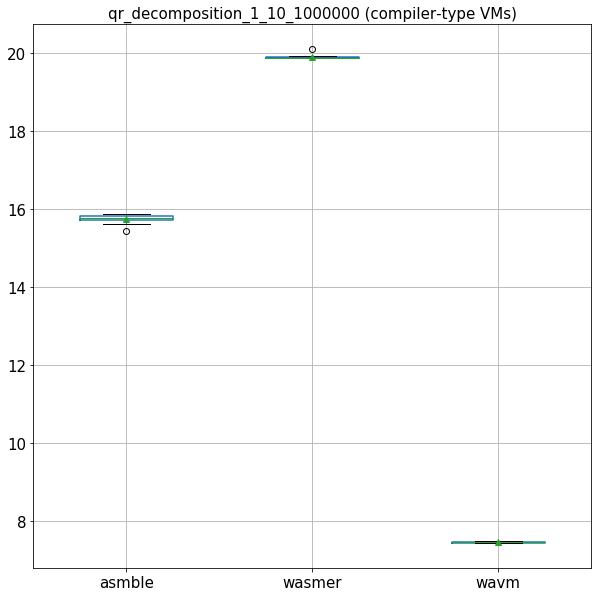

In [53]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms, figsize, plot_test_name + " (compiler-type VMs)", fontsize)

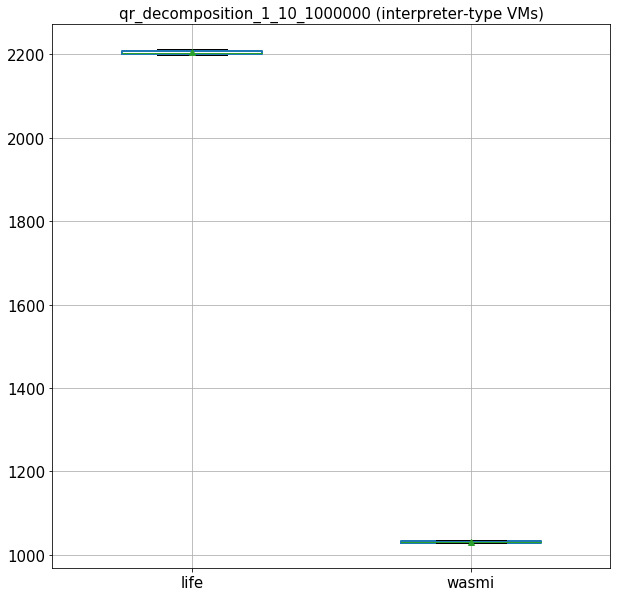

In [54]:
vm = df_results[plot_test_name].boxplot(figsize=figsize, column=interpreter_type_vms, return_type='dict',widths=0.5, fontsize=fontsize, showmeans=True)
adjust_line2D_linewidth(vm, 2, 1, 1, 1)
plt.title(plot_test_name + " (interpreter-type VMs)", fontsize=fontsize)
plt.show()

<h3>qr_decomposition_1_500_100</h3>

In [55]:
plot_test_name="qr_decomposition_1_500_100"
figsize=(10,10)

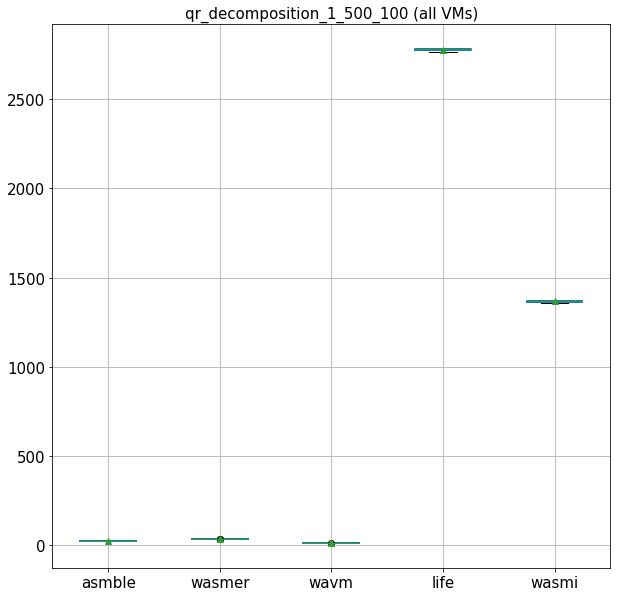

In [56]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms + interpreter_type_vms, figsize, plot_test_name + " (all VMs)", fontsize)

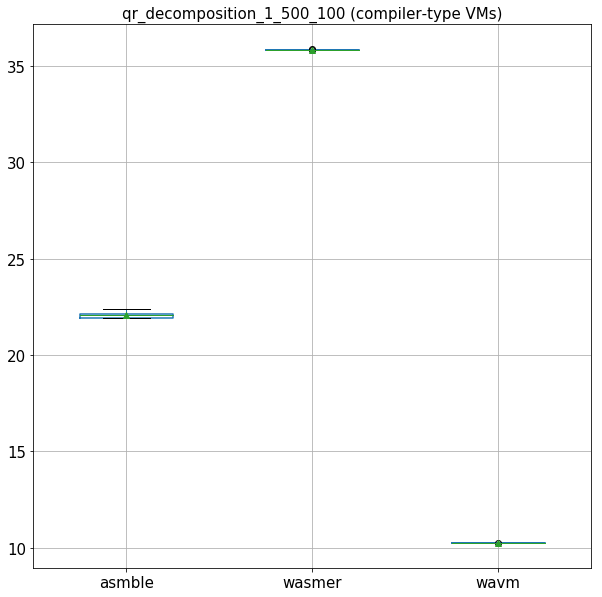

In [57]:
draw_plotbox(df_results[plot_test_name], compiler_type_vms, figsize, plot_test_name + " (compiler-type VMs)", fontsize)

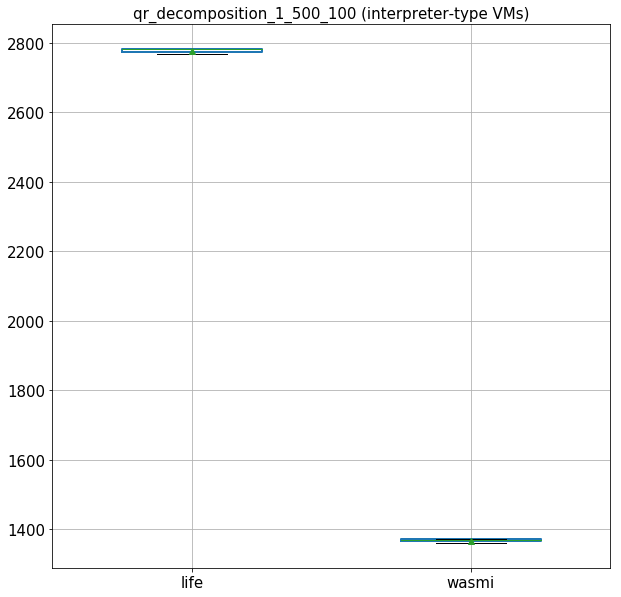

In [58]:
vm = df_results[plot_test_name].boxplot(figsize=figsize, column=interpreter_type_vms, return_type='dict',widths=0.5, fontsize=fontsize, showmeans=True)
adjust_line2D_linewidth(vm, 2, 1, 1, 1)
plt.title(plot_test_name + " (interpreter-type VMs)", fontsize=fontsize)
plt.show()